In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1- EDA Explore Data

In [325]:
data = pd.read_excel('peace_builder.xlsx')

data.head()

,start,end,الجنس,العمر,على مقياس 1-10 (1 قليل جدا- 10 كثير جدا) / الى اي حد تعتبلر نفسك مستقر نفسيا؟,"ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا""؟","ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا""؟/العائلة","ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا""؟/الدراسة","ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا""؟/العمل","ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا""؟/العلاقات العاطفية",...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2023-05-10 13:26:14.909,2023-05-10 13:30:20.358,انثى,35,3,العائلة العلاقات العاطفية الوضع الاقتصادي ا...,1,0,0,1,...,237159324,917e2696-2c82-4a53-89d6-4d794021f06a,2023-05-10 10:30:31,NaN,NaN,submitted_via_web,NaN,vNA323skLQjDDczfVdD9N2,NaN,1
1,2023-05-10 13:29:08.425,2023-05-10 13:32:22.497,ذكر,18,9,العائلة الوضع السياسي,1,0,0,0,...,237159761,9c4bae2d-0fe9-42be-9f0d-b411a7af350b,2023-05-10 10:32:14,NaN,NaN,submitted_via_web,NaN,vNA323skLQjDDczfVdD9N2,NaN,2
2,2023-05-10 13:28:43.617,2023-05-10 13:32:00.669,انثى,37,7,العائلة,1,0,0,0,...,237160068,ef2880b1-c280-4fbc-b253-e06b2a134625,2023-05-10 10:33:04,NaN,NaN,submitted_via_web,NaN,vNA323skLQjDDczfVdD9N2,NaN,3
3,2023-05-10 13:27:59.405,2023-05-10 13:32:56.109,انثى,19,7,العائلة الدراسة العمل,1,1,1,0,...,237160096,6b2c1c1b-9ebb-4b5c-8e8e-182c40347e2d,2023-05-10 10:33:09,NaN,NaN,submitted_via_web,NaN,vNA323skLQjDDczfVdD9N2,NaN,4
4,2023-05-10 13:31:51.692,2023-05-10 13:37:11.102,انثى,17,6,العائلة الدراسة غياب الوعي و الدعم المجتمعي,1,1,0,0,...,237161312,6948be5e-b6d5-442c-885c-5fba2c481865,2023-05-10 10:37:22,NaN,NaN,submitted_via_web,NaN,vNA323skLQjDDczfVdD9N2,NaN,5


In [326]:
# change data format
from datetime import datetime
data[['start', 'end']] = data[['start', 'end']].applymap(lambda x: datetime.strftime(x, '%d/%m/%Y'))
data[['start', 'end']].head()

C:\Users\User\AppData\Local\Temp\ipykernel_17432\60128249.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[['start', 'end']] = data[['start', 'end']].applymap(lambda x: datetime.strftime(x, '%d/%m/%Y'))


,start,end
0,10/05/2023,10/05/2023
1,10/05/2023,10/05/2023
2,10/05/2023,10/05/2023
3,10/05/2023,10/05/2023
4,10/05/2023,10/05/2023


In [327]:
# Remove unwanted columns 
columns_to_remove = [0, 1, 5, 17, 18, 27, 28, 34, 35, 45, 46, 47,48,49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
data = data.drop(data.columns[columns_to_remove], axis=1)
data.columns

Index(['الجنس', 'العمر',
       'على مقياس 1-10 (1 قليل جدا- 10 كثير جدا) / الى اي حد تعتبلر نفسك مستقر نفسيا؟',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/العائلة ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الدراسة ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/العمل ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/العلاقات العاطفية ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الوضع الاقتصادي ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الوضع السياسي ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/اللجوء و العنصرية',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/وسائل التواصل الاحتماعي',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/خطر المخدرات و القمار ',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الوضع الامني',
       'ما هي العوامل التي تأثر ع

In [328]:
#Rename columns
data.rename(columns={'start': 'date', 'الجنس': 'الجنس', 'العمر':'العمر',
       'على مقياس 1-10 (1 قليل جدا- 10 كثير جدا) / الى اي حد تعتبلر نفسك مستقر نفسيا؟':'مستقر نفسيا',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/العائلة ':'العائلة',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الدراسة ':'الدراسة',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/العمل ':'العمل',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/العلاقات العاطفية ':'العلاقات_العاطفية',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الوضع الاقتصادي ':'الوضع_الاقتصادي',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الوضع السياسي ':'الوضع_السياسي',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/اللجوء و العنصرية':'العنصرية',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/وسائل التواصل الاحتماعي':'وسائل_التواصل_الاحتماعي',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/خطر المخدرات و القمار ':'المخدرات_القمار',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/الوضع الامني':'الوضع الامني',
       'ما هي العوامل التي تأثر على استقرارك النفسي ايجايا و سلبا"؟/غياب الوعي و الدعم المجتمعي ':'غياب_الوعي',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/التحدث الى الاصدقاء ':'العلاج_بالاصدقاء',''
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/علاج نفسي ':'العلاج_النفسي',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/التدخين ':'العلاج_بالتدخين',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/الرياضة':'العلاج_بالرياضة',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/الحوار ':'العلاج_بالحوار',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/التطوع و المشاركة المجتمعية ':'العلاج_بالتطوع',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/الفنون ':'العلاج_بالفنون',
       'اي من الطرق التالية تعتمد للمواجهة الضغوطات؟/غير ذلك':'علاجات_أخرى',
       'ما هي النشاطات االمحيطة بك التي تريحك نفسيا و تبعدك عن الضغوطات؟/انشطة  ثقافية و توعوية ':'انشطة_ ثقافية',
       'ما هي النشاطات االمحيطة بك التي تريحك نفسيا و تبعدك عن الضغوطات؟/انشطة رياضية ':'انشطة_رياضية',
       'ما هي النشاطات االمحيطة بك التي تريحك نفسيا و تبعدك عن الضغوطات؟/انشطة ترفيهية ':'انشطة_ترفيهية',
       'ما هي النشاطات االمحيطة بك التي تريحك نفسيا و تبعدك عن الضغوطات؟/لا يوجد ':'لا_انشطة',
       'ما هي النشاطات االمحيطة بك التي تريحك نفسيا و تبعدك عن الضغوطات؟/غير ذلك ':'انشطة_اخرى',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /الاستثمار في التعليم بما فيه التهليم المهني ':'الحلول_تعليم',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /زيادة المشاريع التي تستهدف الشباب من أجل رفع الوعي و المشاركة':'الحلول_مشاركة_اجتماعية',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /مشاريع  مهارات حياتية و سبل عيش ':'حلول_مهارات_حياتية',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /انشطة توعوية و انشطة دعم نفسي اجتماعي ':'حلول_وعي_اجتماعي',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /توعية الاهل ':'حلول_توعية_الاهل',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /مسابقات رياضية وفنية ':'حلول_رياضية_فنية',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /مشاريع لتطوير المهارات و المواهب ':'حلول_تطوير_المهارات',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /المشاركة في العمل السياسي ':'الحلول_المشاركة_السياسية',
       'برايك ,ماهي ابرز التدخلات و الحلول الواردة لمساعدة  الشباب في برجا وتخفيف المشاكل التي يعانون منها ؟ /غير ذلك':'حلول_اخرى'},inplace=True)

In [329]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
def f(x):
    out=get_display( arabic_reshaper.reshape(x))
    return(out)

In [330]:
data.columns

Index(['الجنس', 'العمر', 'مستقر نفسيا', 'العائلة', 'الدراسة', 'العمل',
       'العلاقات_العاطفية', 'الوضع_الاقتصادي', 'الوضع_السياسي', 'العنصرية',
       'وسائل_التواصل_الاحتماعي', 'المخدرات_القمار', 'الوضع الامني',
       'غياب_الوعي', 'العلاج_بالاصدقاء', 'العلاج_النفسي', 'العلاج_بالتدخين',
       'العلاج_بالرياضة', 'العلاج_بالحوار', 'العلاج_بالتطوع', 'العلاج_بالفنون',
       'علاجات_أخرى', 'انشطة_ ثقافية', 'انشطة_رياضية', 'انشطة_ترفيهية',
       'لا_انشطة', 'انشطة_اخرى', 'الحلول_تعليم', 'الحلول_مشاركة_اجتماعية',
       'حلول_مهارات_حياتية', 'حلول_وعي_اجتماعي', 'حلول_توعية_الاهل',
       'حلول_رياضية_فنية', 'حلول_تطوير_المهارات', 'الحلول_المشاركة_السياسية',
       'حلول_اخرى'],
      dtype='object')

In [352]:
data.sum().sort_values(ascending=False)

العمر                       9259
مستقر نفسيا                 1423
الوضع_الاقتصادي              197
الحلول_مشاركة_اجتماعية       154
حلول_توعية_الاهل             149
العائلة                      142
العلاج_بالاصدقاء             116
انشطة_ترفيهية                114
حلول_مهارات_حياتية           111
حلول_وعي_اجتماعي             110
حلول_تطوير_المهارات          106
الجنس                         97
الحلول_تعليم                  90
انشطة_ ثقافية                 88
انشطة_رياضية                  86
العمل                         82
الدراسة                       81
العلاج_بالرياضة               80
حلول_رياضية_فنية              79
العلاج_بالحوار                74
غياب_الوعي                    71
لا_انشطة                      70
العلاج_بالتطوع                69
العلاج_بالتدخين               68
الوضع_السياسي                 64
الوضع الامني                  61
العلاقات_العاطفية             54
العلاج_بالفنون                51
المخدرات_القمار               45
العنصرية                      44
علاجات_أخر

In [332]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
العمر,278.0,41.161871,119.197644,4.0,18.25,29.5,47.00,1991.0
مستقر نفسيا,278.0,5.118705,2.923256,0.0,4.00,5.0,7.00,10.0
العائلة,278.0,0.510791,0.500785,0.0,0.00,1.0,1.00,1.0
الدراسة,278.0,0.291367,0.455212,0.0,0.00,0.0,1.00,1.0
العمل,278.0,0.294964,0.456849,0.0,0.00,0.0,1.00,1.0
العلاقات_العاطفية,278.0,0.194245,0.396332,0.0,0.00,0.0,0.00,1.0
الوضع_الاقتصادي,278.0,0.708633,0.455212,0.0,0.00,1.0,1.00,1.0
الوضع_السياسي,278.0,0.230216,0.421730,0.0,0.00,0.0,0.00,1.0
العنصرية,278.0,0.158273,0.365655,0.0,0.00,0.0,0.00,1.0
وسائل_التواصل_الاحتماعي,278.0,0.133094,0.340288,0.0,0.00,0.0,0.00,1.0


## Cleaning Data

In [333]:
# coorection ages (251!, 1991!)
data['العمر'].replace(to_replace=251, value=25, inplace=True)
data['العمر'].replace(to_replace=1991, value=33, inplace=True)
data.replace(['افضل عدم الاجابة ', 'انثى'], 0, inplace=True)
data.replace(['ذكر'], 1, inplace=True)


In [334]:
data['الجنس'].value_counts()

الجنس
0    181
1     97
Name: count, dtype: int64

In [335]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
الجنس,278.0,0.348921,0.477488,0.0,0.00,0.0,1.00,1.0
العمر,278.0,33.305755,16.223508,4.0,18.25,29.0,47.00,82.0
مستقر نفسيا,278.0,5.118705,2.923256,0.0,4.00,5.0,7.00,10.0
العائلة,278.0,0.510791,0.500785,0.0,0.00,1.0,1.00,1.0
الدراسة,278.0,0.291367,0.455212,0.0,0.00,0.0,1.00,1.0
العمل,278.0,0.294964,0.456849,0.0,0.00,0.0,1.00,1.0
العلاقات_العاطفية,278.0,0.194245,0.396332,0.0,0.00,0.0,0.00,1.0
الوضع_الاقتصادي,278.0,0.708633,0.455212,0.0,0.00,1.0,1.00,1.0
الوضع_السياسي,278.0,0.230216,0.421730,0.0,0.00,0.0,0.00,1.0
العنصرية,278.0,0.158273,0.365655,0.0,0.00,0.0,0.00,1.0


## Spliting the data frame to subsets

In [336]:
الاستقرار_النفسي = data.iloc[:, 0:14]
الاستقرار_النفسي.head()

,الجنس,العمر,مستقر نفسيا,العائلة,الدراسة,العمل,العلاقات_العاطفية,الوضع_الاقتصادي,الوضع_السياسي,العنصرية,وسائل_التواصل_الاحتماعي,المخدرات_القمار,الوضع الامني,غياب_الوعي
0,0,35,3,1,0,0,1,1,1,0,0,0,1,1
1,1,18,9,1,0,0,0,0,1,0,0,0,0,0
2,0,37,7,1,0,0,0,0,0,0,0,0,0,0
3,0,19,7,1,1,1,0,0,0,0,0,0,0,0
4,0,17,6,1,1,0,0,0,0,0,0,0,0,1


In [337]:
العلاج = data.iloc[:, [0, 1] + list(range(14, 22))]
العلاج.head()

,الجنس,العمر,العلاج_بالاصدقاء,العلاج_النفسي,العلاج_بالتدخين,العلاج_بالرياضة,العلاج_بالحوار,العلاج_بالتطوع,العلاج_بالفنون,علاجات_أخرى
0,0,35,1,0,1,0,0,0,0,0
1,1,18,0,0,0,1,0,0,0,0
2,0,37,1,0,0,0,0,0,0,0
3,0,19,0,0,0,0,1,0,0,0
4,0,17,0,0,0,0,0,1,0,0


In [338]:
انشطة = data.iloc[:, [0, 1] + list(range(22, 26))]
انشطة.head()

,الجنس,العمر,انشطة_ ثقافية,انشطة_رياضية,انشطة_ترفيهية,لا_انشطة
0,0,35,1,0,1,0
1,1,18,1,1,0,0
2,0,37,0,0,1,0
3,0,19,1,0,0,0
4,0,17,1,0,0,0


In [339]:
الحلول = data.iloc[:, [0, 1] + list(range(27, 35))]
الحلول.head()

,الجنس,العمر,الحلول_تعليم,الحلول_مشاركة_اجتماعية,حلول_مهارات_حياتية,حلول_وعي_اجتماعي,حلول_توعية_الاهل,حلول_رياضية_فنية,حلول_تطوير_المهارات,الحلول_المشاركة_السياسية
0,0,35,0,0,1,1,1,1,1,0
1,1,18,1,0,0,0,1,0,0,0
2,0,37,0,0,0,1,1,0,1,0
3,0,19,0,1,1,0,0,1,1,0
4,0,17,0,1,0,0,1,0,0,0


##   Visualization

In [340]:
import arabic_reshaper
from bidi.algorithm import get_display

# Assuming `column_names` is the list of column names in Arabic
#column_names = ['اسم العمود 1', 'اسم العمود 2', 'اسم العمود 3']  # example Replace with actual column names

# Reshape and display the Arabic column names correctly
#data.columns = [get_display(arabic_reshaper.reshape(name)) for name in data.columns]

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


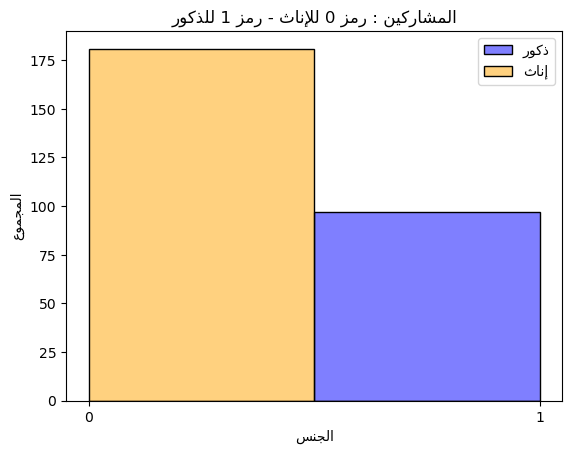

In [341]:
legend_labels = [ 'ذكور', 'إناث',]
reshaped_legend_labels = [get_display(arabic_reshaper.reshape(label)) for label in legend_labels]

sns.histplot(data=data, x='الجنس', bins= 2, hue='الجنس', palette={ 0:'orange', 1:'blue'})
plt.xlabel(f('الجنس'))
plt.ylabel(f('المجموع'))
plt.title(f('المشاركين : رمز 0 للإناث - رمز 1 للذكور'))
plt.xticks([0,1])
plt.legend(reshaped_legend_labels)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


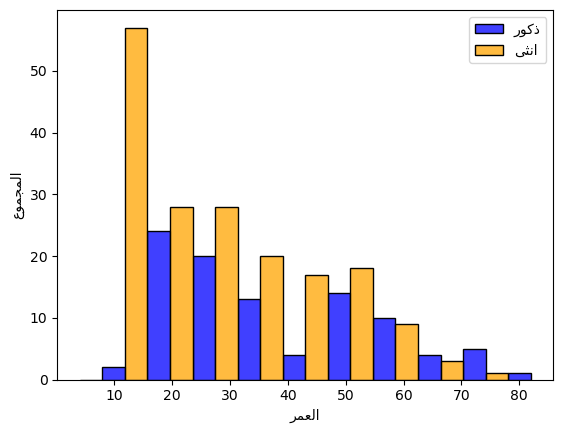

In [342]:
legend_labels = [ 'ذكور','انثى']
reshaped_legend_labels = [get_display(arabic_reshaper.reshape(label)) for label in legend_labels]
sns.histplot(data=data, x='العمر', hue='الجنس',multiple='dodge',palette={0: 'orange', 1: 'blue'})
plt.xlabel(f('العمر'))
plt.ylabel(f('المجموع'))
plt.legend(reshaped_legend_labels)
plt.show()

In [343]:

subsets = [الاستقرار_النفسي,العلاج, انشطة, الحلول ]

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


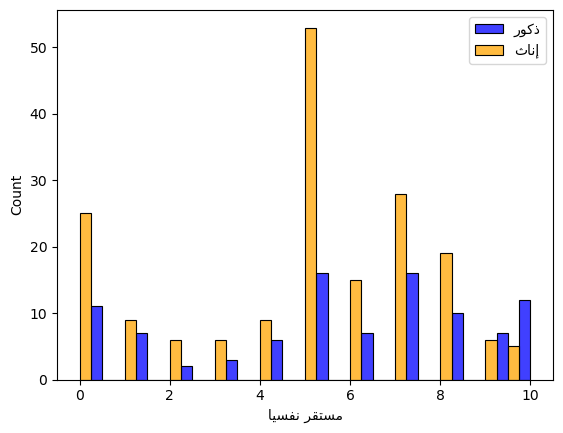

In [344]:
legend_labels = [ 'ذكور', 'إناث',]
reshaped_legend_labels = [get_display(arabic_reshaper.reshape(label)) for label in legend_labels]

sns.histplot(data=الاستقرار_النفسي, x='مستقر نفسيا', hue='الجنس', multiple='dodge', palette={0: 'orange', 1: 'blue'}, binwidth=0.5)
plt.xlabel(f('مستقر نفسيا'))
plt.legend(reshaped_legend_labels)
plt.show()

In [345]:
column_to_drop = ['الجنس','العمر','مستقر نفسيا']
الاستقرار_النفسي.drop(columns=column_to_drop, inplace=True, errors='ignore',axis=1)
الاستقرار_النفسي.describe().T


C:\Users\User\AppData\Local\Temp\ipykernel_17432\2644395851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  الاستقرار_النفسي.drop(columns=column_to_drop, inplace=True, errors='ignore',axis=1)


,count,mean,std,min,25%,50%,75%,max
العائلة,278.0,0.510791,0.500785,0.0,0.0,1.0,1.0,1.0
الدراسة,278.0,0.291367,0.455212,0.0,0.0,0.0,1.0,1.0
العمل,278.0,0.294964,0.456849,0.0,0.0,0.0,1.0,1.0
العلاقات_العاطفية,278.0,0.194245,0.396332,0.0,0.0,0.0,0.0,1.0
الوضع_الاقتصادي,278.0,0.708633,0.455212,0.0,0.0,1.0,1.0,1.0
الوضع_السياسي,278.0,0.230216,0.421730,0.0,0.0,0.0,0.0,1.0
العنصرية,278.0,0.158273,0.365655,0.0,0.0,0.0,0.0,1.0
وسائل_التواصل_الاحتماعي,278.0,0.133094,0.340288,0.0,0.0,0.0,0.0,1.0
المخدرات_القمار,278.0,0.161871,0.368996,0.0,0.0,0.0,0.0,1.0
الوضع الامني,278.0,0.219424,0.414603,0.0,0.0,0.0,0.0,1.0


In [378]:
column_sums = الاستقرار_النفسي.sum().sort_values(ascending=False)
percentage = (column_sums / column_sums.sum()) * 100 
percentage_formatted = percentage.map(lambda x: "{:.2f}".format(x))
percentage_formatted 

الوضع_الاقتصادي            22.44
العائلة                    16.17
العمل                       9.34
الدراسة                     9.23
غياب_الوعي                  8.09
الوضع_السياسي               7.29
الوضع الامني                6.95
العلاقات_العاطفية           6.15
المخدرات_القمار             5.13
العنصرية                    5.01
وسائل_التواصل_الاحتماعي     4.21
dtype: object

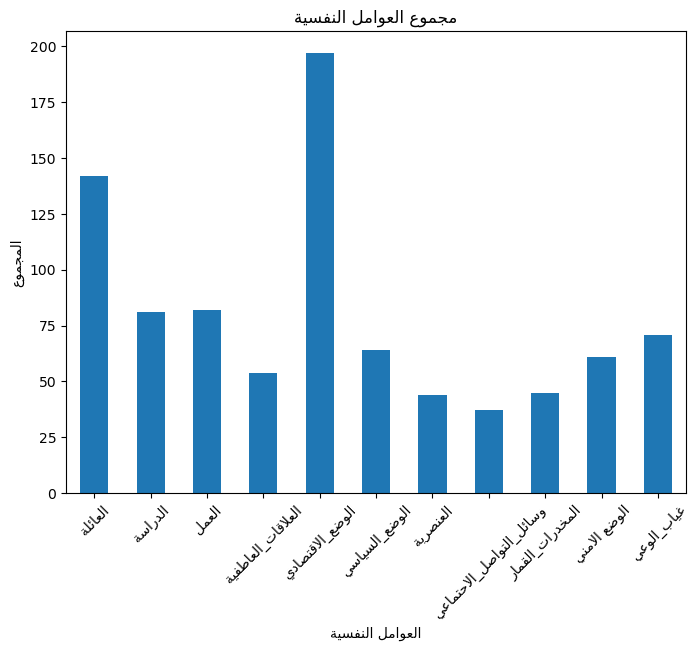

In [363]:
column_sums = الاستقرار_النفسي.sum()
column_names = الاستقرار_النفسي.columns

reshaped_names = [get_display(arabic_reshaper.reshape(name)) for name in column_names] # show arabic letters in order

# Plot totals
plt.figure(figsize=(8, 6))
column_sums.plot(kind='bar')
plt.title(f('مجموع العوامل النفسية'))
plt.xlabel(f('العوامل النفسية'))
plt.ylabel(f('المجموع'))
plt.xticks(range(len(reshaped_names)), reshaped_names , rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17432\1925523994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  العلاج.drop(columns=column_to_drop, inplace=True, errors='ignore',axis=1)


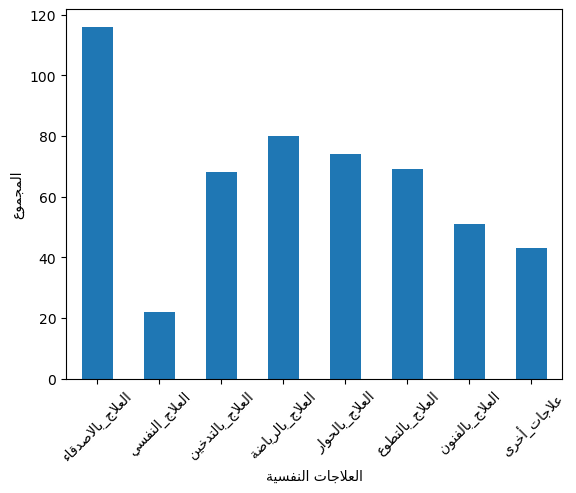

In [359]:
column_to_drop = ['الجنس','العمر']
العلاج.drop(columns=column_to_drop, inplace=True, errors='ignore',axis=1)

column_sums = العلاج.sum()
column_names = العلاج.columns

reshaped_names = [get_display(arabic_reshaper.reshape(name)) for name in column_names] # show arabic letters in order

# Plot totals
column_sums.plot(kind='bar')
plt.xlabel(f('العلاجات النفسية'))
plt.ylabel(f('المجموع'))
plt.xticks(range(len(reshaped_names)), reshaped_names , rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17432\955939667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  انشطة.drop(columns=column_to_drop, inplace=True, errors='ignore',axis=1)


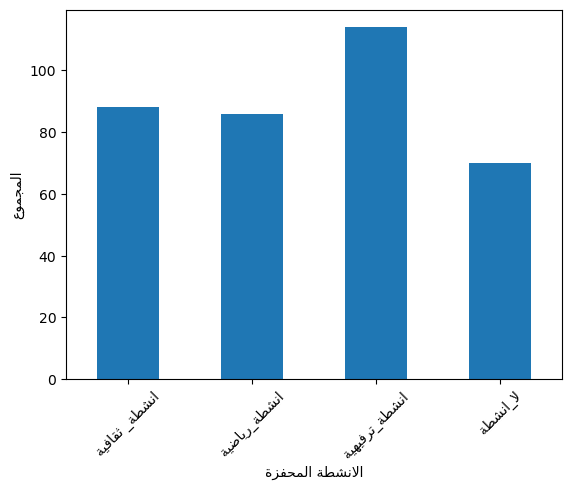

In [360]:
column_to_drop = ['الجنس','العمر']
انشطة.drop(columns=column_to_drop, inplace=True, errors='ignore',axis=1)

column_sums = انشطة.sum()
column_names = انشطة.columns

reshaped_names = [get_display(arabic_reshaper.reshape(name)) for name in column_names] # show arabic letters in order

# Plot totals
column_sums.plot(kind='bar')
plt.xlabel(f('الانشطة المحفزة'))
plt.ylabel(f('المجموع'))
plt.xticks(range(len(reshaped_names)), reshaped_names , rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17432\2052256831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  الحلول.drop(columns=['الجنس','العمر'], inplace=True, errors='ignore',axis=1)


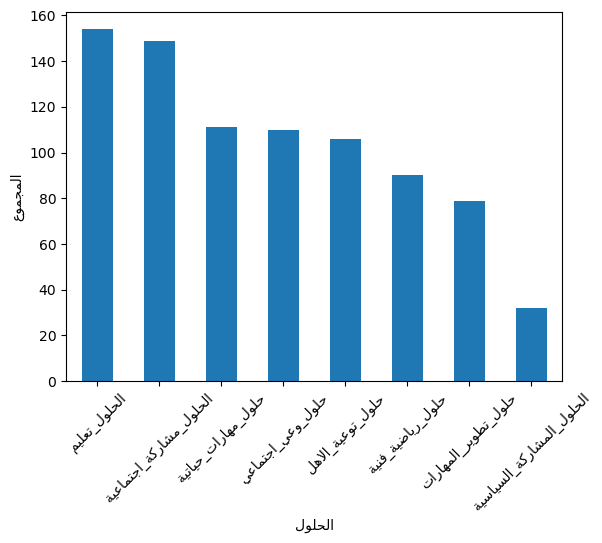

In [349]:
#column_to_drop = ['الجنس','العمر']
الحلول.drop(columns=['الجنس','العمر'], inplace=True, errors='ignore',axis=1)

column_sums = الحلول.sum().sort_values(ascending=False)
column_names = الحلول.columns

reshaped_names = [get_display(arabic_reshaper.reshape(name)) for name in column_names] # show arabic letters in order

# Plot totals
column_sums.plot(kind='bar')
plt.xlabel(f('الحلول'))
plt.ylabel(f('المجموع'))
plt.xticks(range(len(reshaped_names)), reshaped_names , rotation=45)
plt.show()